LATER Fitting Exercise

Copyright 2023 by Joshua I. Gold, University of Pennsylvania

The basic idea in fitting a model to data is to find the parameters of the model that provide in some sense the best match of the model to the
data. This match is provided by the "objective function."  This exercise is intended to demystify this process by getting you to define the initial conditions and objective function for fitting the LATER model to RT data. For a much more thorough, but still very accessible, overview of model fitting (to behavioral data), here is a great place to start:

https://elifesciences.org/articles/49547

For this exercise, recall that the point of the LATER model is that 1/RT is distributed as a Gaussian, where we can define the parameters
of the Gaussian (mu and sigma) with respect to the standard parameters of the LATER model (muR and deltaS):
       mu = muR/deltaS
       sigma = 1/deltaS

So fitting LATER to behavioral data involves finding parameters muR and deltaS that provide the best match to the data, according to
the appropriate objective function.

Follow along the steps below, some of which will require you to complete the code (and therefore hopefully think about how to relate the high-level concepts discussed above with the nitty-gritty part of getting everything to actually work.

1. Get the data
Use this code to get a data set (array of RTs from a single condition) to fit, already preprocessed to include correct trials only and remove outliers (including express saccades). See later_getData for details

data = later_getData([], [], 0.2);
RTs = data{1};
clear data

2. Define the objective function
The objective function typically defines the error that you want to minimize between your data and the model predictions. A common objective function is the negative of the sum of the log-likelihoods of the data, given the model parameters. To unpack that for the LATER model:

   1. For each data point (RT from a single trial, in this case) and given set of model parameters, compute the probability of the data, given the model (i.e., the likelihood)
   2. Take the logarithm
  3. Sum all these log-likelihoods from all the data points
  4. Take the negative, because we want to find the minimum (thus corresponding to the maximum likelihood)

  You can define the function simply using an "anonymous function" (https://www.mathworks.com/help/matlab/matlab_prog/anonymous-functions.html), using this template that assumes that "fits" is a 2x1 vector of[muR, deltaS]:

  EXERCISE:
laterErrFcn = @(fits) <**YOUR OBJECTIVE FUNCTION HERE AS A FUNCTION OF FITS**>;

3. Define initial conditions
   
For the actual fitting, we will use fmincon
(https://www.mathworks.com/help/optim/ug/fmincon.html), which is "function minimization with constraints." This function allows for
constraints that include upper and lower bounds on the parameters. So here we define those bounds, along with the initial values. We'll use fairly arbitrary values for the lower and upper bounds, but we should pick the initial values more judiciously. HINT:
Recall that the muR and deltaS should be strongly related to empirical summary statistics of `the (reciprocal) RT distribution.
lowerBounds = [0.001 0.001];
upperBounds = [1000 1000];

EXERCISE:
initialValues = [<**ADD INITIAL VALUES HERE**>];

4. Run the fits
We will be using GlobalSearch . The general advantage of this approach is to avoid local minima; for details, see: https://www.mathworks.com/help/gads/how-globalsearch-and-multistart-work.html
These options seem to work well, but I don't have a strongerrationale for using them. See the Matlab documentation if you really want to dive in and understand them, and let me know if you find better settings!
opts = optimoptions(@fmincon,    ...
 "function minimization with constraints"
   'Algorithm',   'active-set',  ...
   'MaxIter',     3000,          ...
   'MaxFunEvals', 3000);

Definine the "optimization problem" using variables defined above
problem = createOptimProblem('fmincon',    ...
    'objective',   laterErrFcn,     ...
    Use the objective function
    'x0',          initialValues,   ...  Initial conditions
    'lb',          lowerBounds,     ...  Parameter lower bounds
    'ub',          upperBounds,     ...  Parameter upper bounds
    'options',     opts);                 Options defined above

Create a GlobalSearch object
gs = GlobalSearch;
   
Run it, returning the best-fitting parameter values and the negative-
log-likelihood returned by the objective function
[fits(ii,:), nllk] = run(gs,problem);

**Code written with the help of ChatGPT: https://chatgpt.com/share/670929ba-af68-800f-b47d-20fdb0569c82**

**Adapted the matlab code to run in python (not sure if it's correct)**

In [9]:
##Rewriting and running in python
#Have to recreate the data set based on what the matlab data set is
  ##Had ChatGPT help with recreating the data set (https://chatgpt.com/share/670929ba-af68-800f-b47d-20fdb0569c82)

#Import necessary libraries
import numpy as np
from scipy.optimize import minimize

#Simulate a dataset similar to what 'later_getData' in MATLAB might return
#Assume we get reaction time (RT) data after filtering correct trials and removing outliers

#Simulated RT data for Left and Right choices, Change-point (CP) and Non-CP
#These RTs will be in seconds, and the LATER model assumes 1/RT follows a Gaussian distribution
#Simulated RT data will be the same every time, the data distribution will not change
np.random.seed(42)

#Simulating 100 RTs for each condition
left_choice_no_cp = np.random.normal(0.6, 0.05, 100)
left_choice_cp = np.random.normal(0.55, 0.05, 100)
right_choice_no_cp = np.random.normal(0.65, 0.05, 100)
right_choice_cp = np.random.normal(0.7, 0.05, 100)

#Combine all data into a single dataset (RTs)
RTs = np.concatenate([left_choice_no_cp, left_choice_cp, right_choice_no_cp, right_choice_cp])

#Defining the objective function, calculate the negative log likelihood
#Goal = find the parameter that minimizes the neg log likelihood (= maximizes data under the model)
def laterErrFcn(fits):
    muR, deltaS = fits #optimizer trying to fit the data
    mu = muR / deltaS
    sigma = 1 / deltaS
    # Likelihood: Gaussian probability of 1/RTs under the model
    likelihoods = (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((1/RTs - mu) / sigma)**2)
    log_likelihood = np.sum(np.log(likelihoods))
    return -log_likelihood  # We want to minimize the negative log-likelihood = maximize the log likelihood

# Define initial conditions and bounds
lower_bounds = [0.001, 0.001]
upper_bounds = [1000, 1000]
initial_values = [1, 1]

# Optimization
bounds = [(lower_bounds[i], upper_bounds[i]) for i in range(2)]  # Define bounds

result = minimize(laterErrFcn, initial_values, bounds=bounds, method='L-BFGS-B', options={'maxiter': 3000, 'disp': True})

# Extract the fitted parameters
fits = result.x  # Best-fitting [muR, deltaS]
nllk = result.fun  # Negative log-likelihood

# Display results
fits, nllk


<ipython-input-9-dbd67fb94102>:34: RuntimeWarning: divide by zero encountered in log
  log_likelihood = np.sum(np.log(likelihoods))
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_numdiff.py:590: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


(array([1., 1.]), 452.6475217085227)

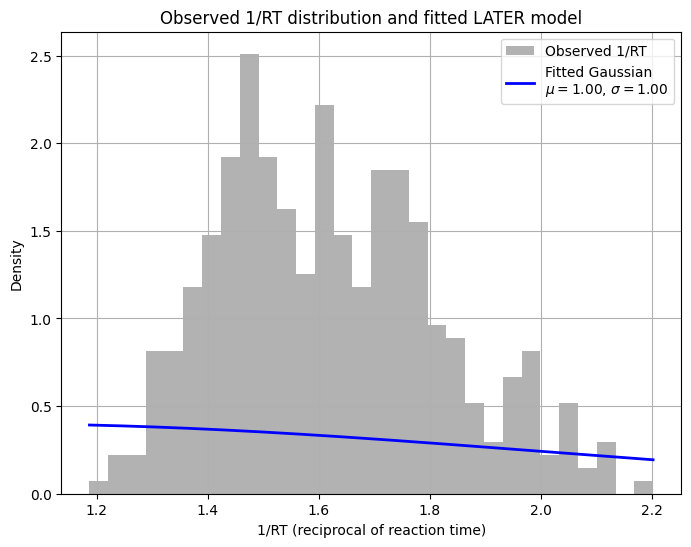

In [12]:
#Plotting to show the data
#Import correct libraries
import matplotlib.pyplot as plt
import numpy as np

#Calculate 1/RTs
inv_RTs = 1 / RTs

#Define the fitted Gaussian distribution based on the fitted parameters
mu = fits[0] / fits[1]  # mu = muR / deltaS
sigma = 1 / fits[1]      # sigma = 1 / deltaS

#Generate x values for the fitted Gaussian
x_vals = np.linspace(min(inv_RTs), max(inv_RTs), 1000)
fitted_gaussian = (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x_vals - mu) / sigma)**2)

#Plot the histogram of the observed 1/RT values
plt.figure(figsize=(8, 6))
plt.hist(inv_RTs, bins=30, density=True, alpha=0.6, color='gray', label='Observed 1/RT')

#Plot the fitted Gaussian curve
plt.plot(x_vals, fitted_gaussian, color='blue', lw=2, label=f'Fitted Gaussian\n$\\mu = {mu:.2f}$, $\\sigma = {sigma:.2f}$')

#Add labels and legend
plt.title('Observed 1/RT distribution and fitted LATER model')
plt.xlabel('1/RT (reciprocal of reaction time)')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()
